In [178]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [179]:
calibration = cv2.imread("calibration.bmp", 1)
hoge = cv2.imread("hoge.bmp", 0)

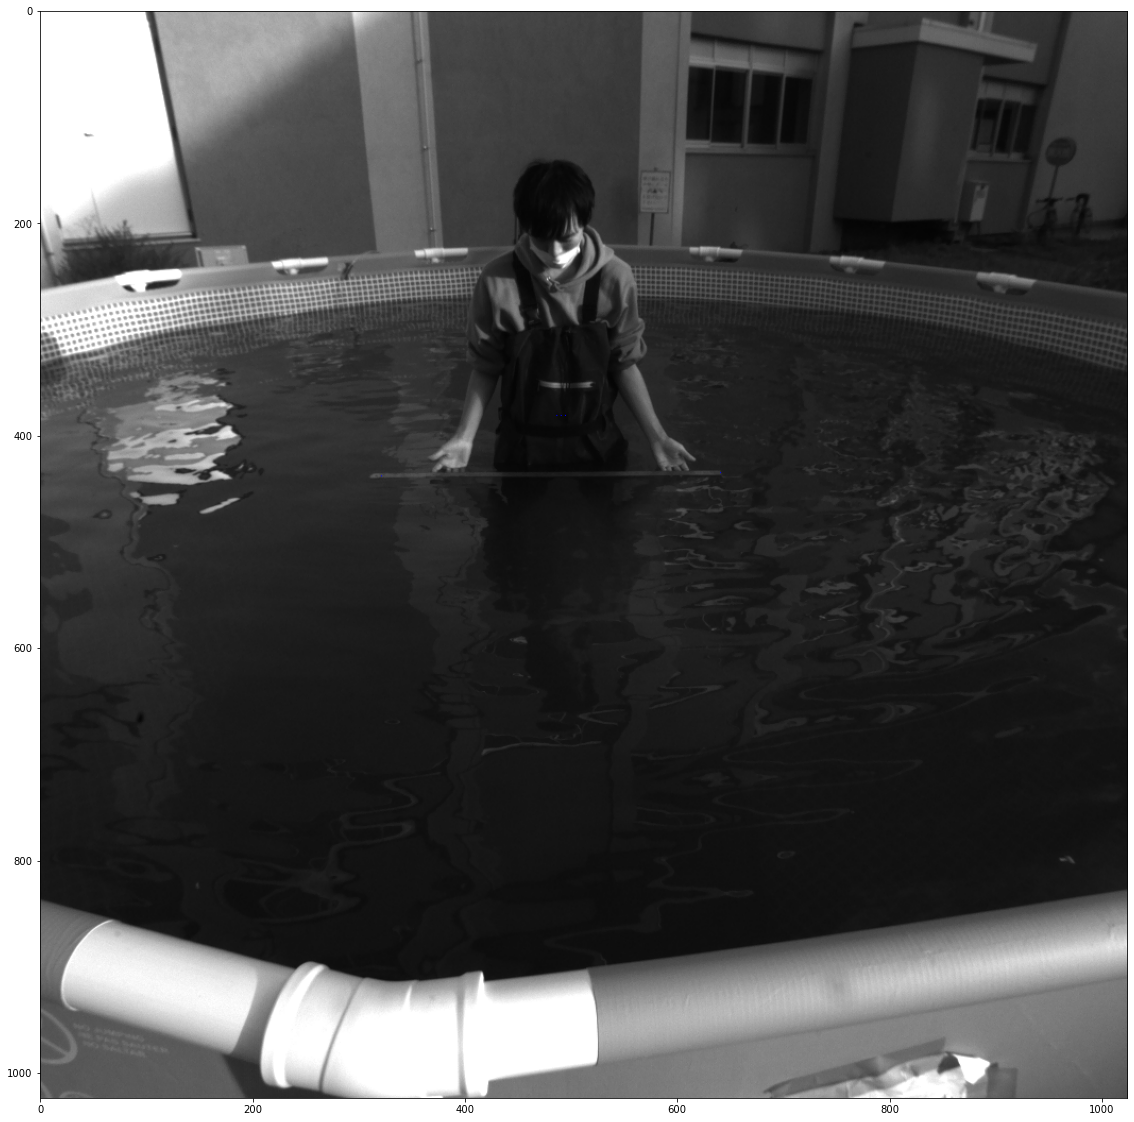

In [180]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(calibration, cmap='gray')

In [181]:
p_original = np.float32([[354, 381], [609, 381], [321, 438], [690, 435], ])
p_trans = np.float32([[354, 381], [609, 381], [374, 500], [629, 500]])
M = cv2.getPerspectiveTransform(p_original, p_trans)

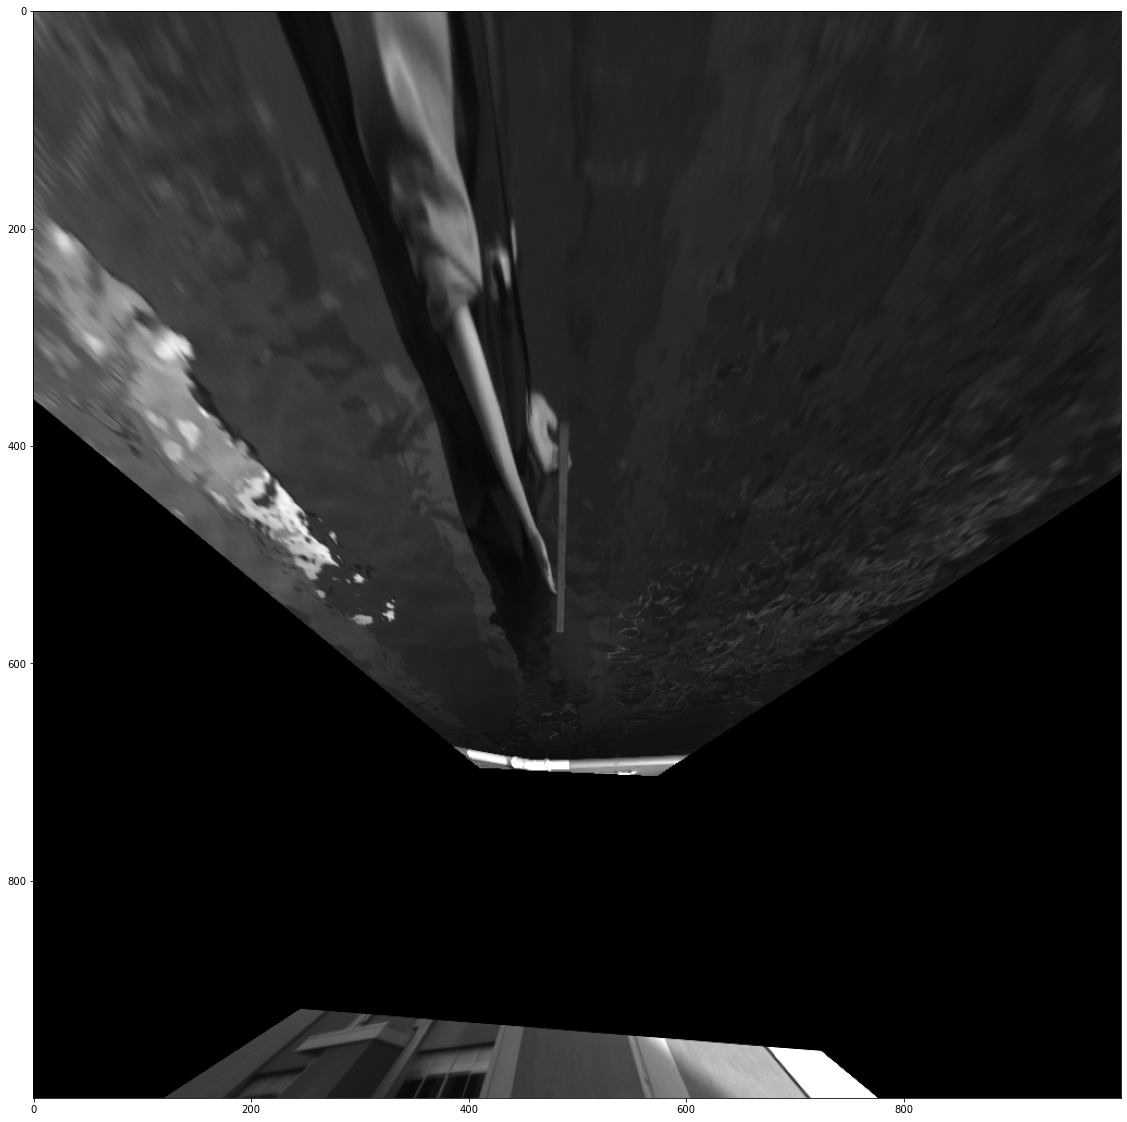

In [182]:
hoge_trans = cv2.warpPerspective(hoge, M, (1000, 1000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(hoge_trans, cmap='gray')

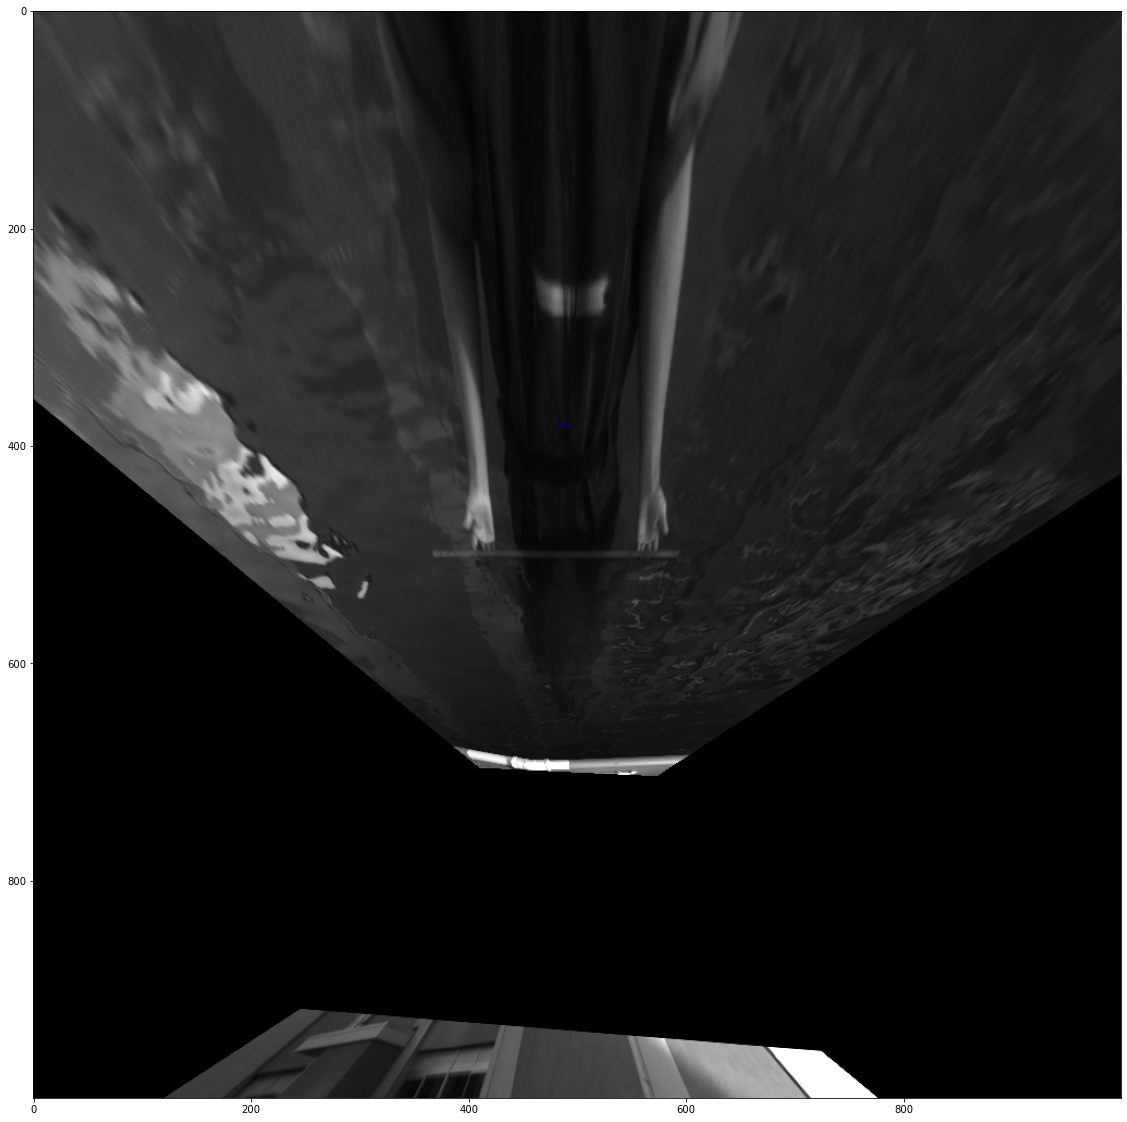

In [183]:
calibration_trans = cv2.warpPerspective(calibration, M, (1000, 1000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(calibration_trans, cmap='gray')

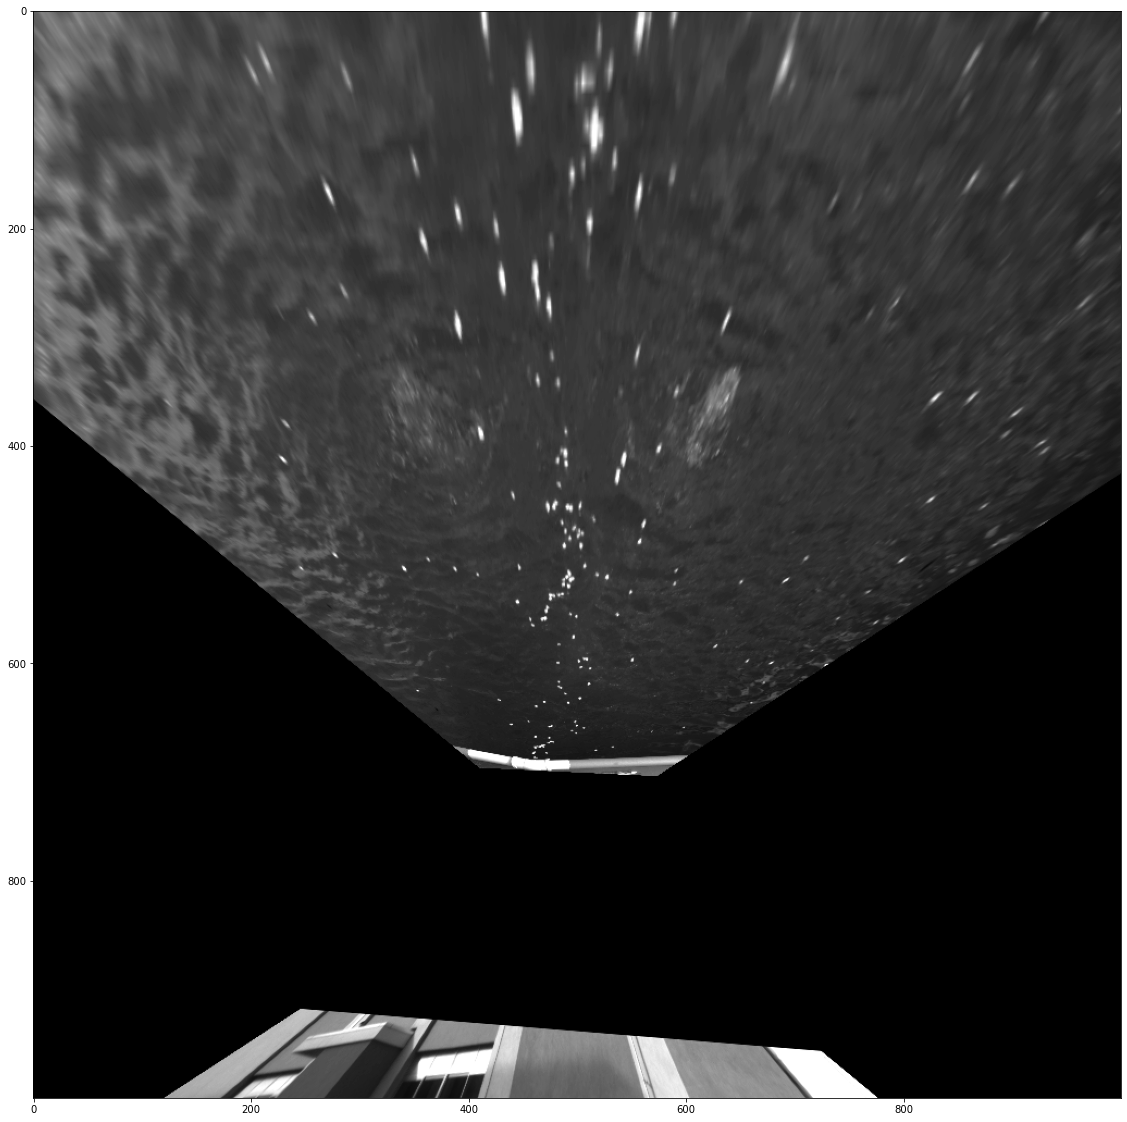

In [184]:
fuga = cv2.imread("fuga.bmp", 0)
fuga_trans = cv2.warpPerspective(fuga, M, (1000, 1000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(fuga_trans, cmap='gray')

In [185]:
_, fuga_trans_th = cv2.threshold(fuga_trans[:678, :], 160, 255, cv2.THRESH_BINARY)

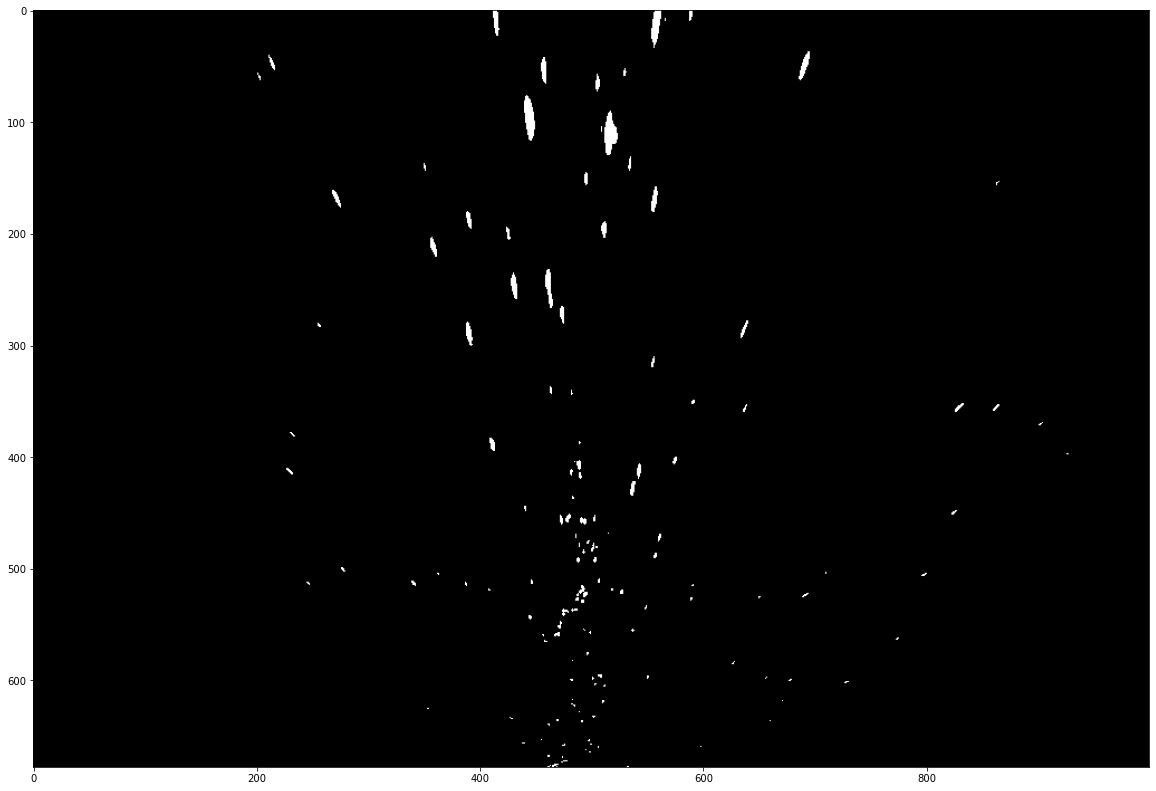

In [186]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(fuga_trans_th, cmap='gray')

In [187]:
def preprocessing(img):
    img = cv2.warpPerspective(img, M, (1000, 1000))
    _, img = cv2.threshold(img[:678, :], 160, 255, cv2.THRESH_BINARY)
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img)

    return centroids, img

In [188]:
DIR_IN = "D:\\pool\\20221028_wada\\dual_40_1_C001H001S0001\\"
DIR_OUT = "D:\\result\\20221028\\img\\dual_1\\1\\"

In [189]:
for i in tqdm(range(1, 10900)):
    _, img = preprocessing(img=cv2.imread(DIR_IN + "dual_40_1_C001H001S0001" + f"{i:06}" + ".bmp", 0))
    cv2.imwrite(DIR_OUT + f"{i}.bmp", img)

100%|██████████| 10899/10899 [04:28<00:00, 40.65it/s]
